In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install pyreadstat

In [188]:
raw_df = pd.read_spss("CY07_MSU_STU_COG_testlet.sav")

In [189]:
fil1 = raw_df.iloc[:, 13:65]
print(fil1.shape)
#print(raw_df.iloc[0, 13:65])

(6650, 52)


In [190]:
fil2 = fil1.replace(['Full credit', '1 - Full credit', '2 - Full credit', 'No credit', '0 - No credit'], [1, 1, 1, 0, 0])
#print(fil2)

In [191]:
fil3 = fil2.drop('CM955Q03S', axis=1)
fil4 = fil3.dropna(how='all')
#print(fil4)

In [192]:
stud_AR = fil4.mean(axis=1)
prob_AR = fil4.mean(axis=0)
#print("Each student's Answer Rates: ", stud_AR)
#print("Answer Rates for each Items: ", prob_AR)

In [193]:
columcolum = fil4.columns
rowscolumns = fil4.shape
print(columcolum, rowscolumns)

Index(['CM033Q01S', 'CM474Q01S', 'CM155Q01S', 'CM155Q04S', 'CM411Q01S',
       'CM411Q02S', 'CM803Q01S', 'CM442Q02S', 'CM034Q01S', 'CM305Q01S',
       'CM496Q01S', 'CM496Q02S', 'CM423Q01S', 'CM192Q01S', 'CM603Q01S',
       'CM571Q01S', 'CM564Q01S', 'CM564Q02S', 'CM447Q01S', 'CM273Q01S',
       'CM408Q01S', 'CM420Q01S', 'CM446Q01S', 'CM559Q01S', 'CM828Q03S',
       'CM464Q01S', 'CM800Q01S', 'CM982Q01S', 'CM982Q02S', 'CM982Q03S',
       'CM982Q04S', 'CM992Q01S', 'CM992Q02S', 'CM915Q01S', 'CM915Q02S',
       'CM906Q01S', 'CM909Q01S', 'CM909Q02S', 'CM909Q03S', 'CM949Q01S',
       'CM949Q02S', 'CM00GQ01S', 'CM998Q04S', 'CM905Q01S', 'CM919Q01S',
       'CM919Q02S', 'CM954Q01S', 'CM954Q04S', 'CM943Q01S', 'CM943Q02S',
       'CM953Q03S'],
      dtype='object') (2727, 51)


In [194]:
# DataFrame to Numpy
# 'NaN' 자리 찾기 위한 대조군 역할
num_df = fil4.to_numpy()
print(num_df)

# Data shape
rows, columns = num_df.shape
print(rows, columns)

# Data show all
#np.set_printoptions(threshold=np.inf, linewidth=np.inf)
#print(num_df)

[[nan nan nan ... nan nan nan]
 [nan nan nan ...  1. nan  1.]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ...  1.  0.  1.]
 [nan nan nan ...  1. nan  0.]
 [ 0.  1.  1. ... nan nan nan]]
2727 51


In [195]:
# 1, 0 calibration for reasonable result

scarub = np.where(num_df > 0.99, 0.99, num_df)
scourge = np.where(scarub < 0.01, 0.01, scarub)
num_np = scourge
p_df = pd.DataFrame(num_np)
p_solves = p_df.notnull().sum(1)  # 일단 이건 Series 형태
print(num_np)

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ... 0.99  nan 0.99]
 [ nan  nan  nan ...  nan  nan  nan]
 ...
 [ nan  nan  nan ... 0.99 0.01 0.99]
 [ nan  nan  nan ... 0.99  nan 0.01]
 [0.01 0.99 0.99 ...  nan  nan  nan]]


## Selection of students for the test set

In [196]:
from collections import Counter
import random

In [197]:
print(Counter(p_solves))
print(p_solves.max())
print(p_solves.min())

Counter({18: 758, 16: 617, 17: 447, 9: 320, 15: 227, 7: 109, 8: 85, 14: 53, 13: 30, 6: 18, 12: 16, 11: 15, 4: 10, 5: 7, 10: 5, 2: 5, 3: 3, 1: 2})
18
1


In [198]:
print(AA[18])

758


In [199]:
AA = Counter(p_solves)        # Universal variable
BB = list(AA.keys())
print(max(BB))

18


In [200]:
print(basket_winnow.columns)
print(basket_winnow.columns.to_list())

NameError: name 'basket_winnow' is not defined

In [204]:
gagong_test1 = basket_ini.copy()
gagong_test2 = gagong_test1[gagong_test1['NS'] == 18]
gagong_test3 = gagong_test2.notnull().sum()
print(gagong_test3)
print(gagong_test3.index.to_list())

CM033Q01S    308
CM474Q01S    308
CM155Q01S    308
CM155Q04S    308
CM411Q01S    308
CM411Q02S    308
CM803Q01S    308
CM442Q02S    308
CM034Q01S    308
CM305Q01S    456
CM496Q01S    456
CM496Q02S    456
CM423Q01S    456
CM192Q01S    456
CM603Q01S    456
CM571Q01S    456
CM564Q01S    456
CM564Q02S    456
CM447Q01S    449
CM273Q01S    449
CM408Q01S    449
CM420Q01S    449
CM446Q01S    449
CM559Q01S    449
CM828Q03S    449
CM464Q01S    449
CM800Q01S    449
CM982Q01S    303
CM982Q02S    303
CM982Q03S    303
CM982Q04S    303
CM992Q01S    303
CM992Q02S    303
CM915Q01S    303
CM915Q02S    303
CM906Q01S    303
CM909Q01S      0
CM909Q02S      0
CM909Q03S      0
CM949Q01S      0
CM949Q02S      0
CM00GQ01S      0
CM998Q04S      0
CM905Q01S      0
CM919Q01S      0
CM919Q02S      0
CM954Q01S      0
CM954Q04S      0
CM943Q01S      0
CM943Q02S      0
CM953Q03S      0
NS           758
dtype: int64
['CM033Q01S', 'CM474Q01S', 'CM155Q01S', 'CM155Q04S', 'CM411Q01S', 'CM411Q02S', 'CM803Q01S', 'CM442Q02S'

In [205]:
A_univ = list(range(15,19))
print(A_univ)

[15, 16, 17, 18]


In [206]:
AAA_test = basket_ini.copy()

In [207]:
AAB_test = AAA_test[AAA_test['NS'] == 17]
AAC_test = AAB_test.notnull().sum()

In [186]:
print(AAC_test)
print(AAB_test)

CM033Q01S     9
CM474Q01S     9
CM155Q01S    10
CM155Q04S    10
CM411Q01S     8
CM411Q02S    10
CM803Q01S    10
CM442Q02S     9
CM034Q01S    10
CM305Q01S    11
CM496Q01S    11
CM496Q02S    11
CM423Q01S    10
CM192Q01S    10
CM603Q01S    11
CM571Q01S    10
CM564Q01S    11
CM564Q02S    11
CM447Q01S     8
CM273Q01S     8
CM408Q01S     8
CM420Q01S     7
CM446Q01S     8
CM559Q01S     6
CM828Q03S     8
CM464Q01S     8
CM800Q01S     7
CM982Q01S     8
CM982Q02S     8
CM982Q03S     8
CM982Q04S     7
CM992Q01S     8
CM992Q02S     8
CM915Q01S     7
CM915Q02S     8
CM906Q01S     8
CM909Q01S     0
CM909Q02S     0
CM909Q03S     0
CM949Q01S     0
CM949Q02S     0
CM00GQ01S     0
CM998Q04S     0
CM905Q01S     9
CM919Q01S     9
CM919Q02S     9
CM954Q01S     9
CM954Q04S     9
CM943Q01S     9
CM943Q02S     9
CM953Q03S     9
NS           23
dtype: int64
      CM033Q01S  CM474Q01S  CM155Q01S  CM155Q04S  CM411Q01S  CM411Q02S  \
32          NaN        NaN        NaN        NaN        NaN        NaN   
82     

In [13]:
def finding_null(df_pray):           # return 돼서 나오는 결과물의 data type은 list에 해당
    
    finding_null_result = []
    
    for NS_index in A_univ:
        
        df_gagong1 = df_pray[df_pray['NS'] == NS_index]    # 가장 많이 풀어낸 학생이 풀어낸 문제 개수가 18개, 이거 기준으로 추려내기
        df_counted = df_gagong1.notnull().sum()            # 각 column별 문제를 풀어낸 학생 수가 count 됨 (series 형태)

        residues = df_counted.index.to_list()              # 키질할 columns 데이터프레임 자체를 리스트로 변환
        basket_pray = []
        i = 0                                              # 리스트 인덱싱을 위한 숫자
        indexing = []

        for n in df_counted.index:
            if df_counted[n] == 0:
                basket_pray.append(n)
                indexing.append(i)

            i += 1

        indexing.reverse()

        for j in indexing:
            del residues[j]

        del residues[-1]
        
        finding_null_result.append(residues)
    
    return finding_null_result                # 어쨌든 5부터 18까지 수집될 예정, 리스트 형태로 수집

In [14]:
def simple_random(how_many, data_prey):       # data_prey는 리스트로 들어옴 -> column 이름 리스트
    
    copy_paper = data_prey.copy()
    data_len = len(data_prey)
    
    num_resid = how_many % data_len           # 데이터 하나 더 추출할 문제를 여기서 추출해야 함
    
    an = range(data_len)
    carrier = list(an)
    result = []
    
    for i in range(num_resid):
        n = data_len - i
        j = random.randrange(0, n)
        result.append(carrier[j])
        del carrier[j]
        
    result.sort()
        
    return result

In [15]:
def random_colrow_extractor(df_pray_gagong, list_cols):                   # df_pray_gagong는 이미 가공된 데이터, list_cols는 리스트 형식
    
    coord_list = []
    ind_n = 0
    
    for list_let in list_cols:
        how_many = 2 * AA[A_univ[ind_n]]
        ind_n +=1
        
        pray_columns = list_let.copy()                                                 # column 우선 추출, 리스트 형식으로 데이터를 받음
        pray_column_select_num = simple_random(how_many, pray_columns)                  # column 기준으로 추출한 데이터에서 row(학생)를 비복원 추출 -> for문 돌려야 함
        pray_columns_select = []

        for n in pray_column_select_num:                                             # 추출 한번 더 할 column을 추출
            pray_columns_select.append(pray_columns[n])                               # column 랜덤 생성은 완료, 이제 row 비복원추출 ㄱㄱ   

        pray_gagong = df_pray_gagong.copy()                             # 최초 데이터를 추출한 column으로 가공(gagong)

        num_default = how_many // len(pray_columns)

        coord = {}
        num_iter = 0

        for m in range(len(pray_columns)):                                    # 결국 dictionary 형식으로 데이터를 빼내야 할 듯
            num_iter = num_default
            col_order = pray_columns[m]

            if col_order in pray_columns_select:
                num_iter += 1

            num_comparison = 0

            while num_comparison < num_iter:

                bagess = pray_gagong.iloc[:,m]                                            # 바가지를 경상으로 '바게쓰'라고 부르는 것에 착안
                clear_bagess = bagess.dropna()
                basket_len = clear_bagess.shape[0]

                num_rand = random.randrange(0, basket_len)

                index_list = list(clear_bagess.index)
                x_index = index_list[num_rand]

                coord[x_index] = pray_columns[m]                                  # 선택된 학생, 문제를 딕셔너리로 저장
                pray_gagong.drop(x_index, axis=0, inplace=True)                         # 선택된 학생의 행 데이터 삭제 (비복원 추출을 위함)

                num_comparison += 1

            num_iter += 1
        coord_list.append(coord)
        
    return coord_list                                                           # 딕셔너리 형태로 return

In [16]:
def NaN_gen(df_pray, coord_list):                  # 여기서 df_pray는 num_df급의 원본 데이터를 넣어줘야 함
    test_gags = []
    test_set = {}
    df_result = df_pray.copy()
    
    for coord in coord_list:
        for x_coord in coord.keys():
            y_coord = coord[x_coord]

            test_key = "x_coord = {0}, y_coord = {1}".format(x_coord, y_coord)         # test_set 딕셔너리에 기존값 담기
            test_value = df_result.loc[x_coord][y_coord]
            test_set[test_key] = test_value

            df_result.loc[x_coord][y_coord] = np.nan                                   # test_set 딕셔너리에 담은 값 NaN 처리 (흥남철수 후 흥남부두를 폭파시킨 장면과 유사)
        
    return df_result, test_set                 # df_result는 dataframe 형태로 추출, test_set은 딕셔너리 형태로 추출

In [203]:
# test set에 담을 students 선별: 본게임 시작!

basket_ini = pd.concat([p_df, p_solves], axis=1)

p_df_stunt = p_df.copy()                       # p_df 대역으로 추가
p_df_stunt.columns = fil4.columns.to_list()

basket_column = fil4.columns.to_list()
basket_column.append('NS')                     # NS stands for 'N'umber of the 'S'olved problems

basket_ini.columns = basket_column
basket_gagong_cols = finding_null(basket_ini)     # '가장 많이 풀이한 집단'이 1도 손 대지 않은 문제 column indice를 제거/ 리스트 형식


In [208]:
train_gagongs = []
test_gagongs = []
num_iter = 1           # At first, beta test
#num_iter = 10

for i in range(num_iter):

    Gumeong_dict = random_colrow_extractor(basket_ini, basket_gagong_cols)      # 구멍 뚫을 '좌표' 확정

    num_df_gagong, test_set_gagong = NaN_gen(p_df_stunt, Gumeong_dict)        # Train set(전자), Test set(후자) 각각 생성
        
    train_gagongs.append(num_df_gagong)
    test_gagongs.append(test_set_gagong)


In [209]:
print(train_gagongs[0].shape)
print(len(test_gagongs[0]))

(2727, 51)
3953


In [210]:
print(train_gagongs[0].loc[2052]['CM033Q01S'])
print("Test_set is collected.")
print(test_gagongs[0])
print("The residue is Train_set itself.")
print(train_gagongs[0])

0.99
Test_set is collected.
{'x_coord = 356, y_coord = CM033Q01S': 0.99, 'x_coord = 714, y_coord = CM033Q01S': 0.01, 'x_coord = 511, y_coord = CM033Q01S': 0.99, 'x_coord = 780, y_coord = CM033Q01S': 0.99, 'x_coord = 1235, y_coord = CM033Q01S': 0.99, 'x_coord = 1543, y_coord = CM033Q01S': 0.99, 'x_coord = 1255, y_coord = CM033Q01S': 0.99, 'x_coord = 473, y_coord = CM033Q01S': 0.99, 'x_coord = 1367, y_coord = CM033Q01S': 0.99, 'x_coord = 131, y_coord = CM474Q01S': 0.01, 'x_coord = 151, y_coord = CM474Q01S': 0.99, 'x_coord = 498, y_coord = CM474Q01S': 0.99, 'x_coord = 450, y_coord = CM474Q01S': 0.99, 'x_coord = 2321, y_coord = CM474Q01S': 0.01, 'x_coord = 518, y_coord = CM474Q01S': 0.99, 'x_coord = 2446, y_coord = CM474Q01S': 0.99, 'x_coord = 1741, y_coord = CM474Q01S': 0.99, 'x_coord = 1439, y_coord = CM474Q01S': 0.99, 'x_coord = 927, y_coord = CM155Q01S': 0.99, 'x_coord = 815, y_coord = CM155Q01S': 0.99, 'x_coord = 1968, y_coord = CM155Q01S': 0.99, 'x_coord = 695, y_coord = CM155Q01S': 

In [211]:
test_winnowed = []

In [212]:
for gagong_unit in test_gagongs:
        
    # Threshing the dictionary
    thresh_ini = gagong_unit.copy()
    thresh_keys = thresh_ini.keys()
    thresh_values = thresh_ini.values()
    #print(thresh_keys)
    #print(thresh_values)
    
    # Polishing the raw data
    threshed_result = []

    for axis in thresh_ini.keys():
        carrier_null = []

        axis_split = axis.split(', ')
        carrier_xlist = axis_split[0]
        x_vector = carrier_xlist.split(' = ')
        xlist_coord = int(x_vector[1])

        carrier_ylist = axis_split[1]
        y_vector = carrier_ylist.split(' = ')

        carrier_null.append(xlist_coord)
        carrier_null.append(y_vector[1])
        carrier_null.append(thresh_ini[axis])

        threshed_result.append(carrier_null)
    test_winnowed.append(threshed_result)

In [151]:
print(test_winnowed[0][0][1])

CM033Q01S


## List of Functions What We Need

In [69]:
# 인당 풀이 문제 수 나타내는 함수
def p_sol():
    
    p_solves = p_df.notnull().sum(1)
    p_sol = p_solves.to_numpy()
    p_solT = np.reshape(p_sol, (rows, 1))
    
    return p_solT

In [70]:
# 문제당 풀이 인원 수 나타내는 함수
def q_sol():
    
    q_solves = p_df.notnull().sum()
    q_sol = q_solves.to_numpy()
    q_solT = np.reshape(q_sol, (1, columns))
    
    return q_solT

In [71]:
# 각 학생의 각 문제 정답 기댓값 (모델로 계산)
# 비교대상은 num_df
# theta_let, beta_let, alpha_let은 np
def expect_model(alpha_let, beta_let, theta_let):
#    theta_T = np.transpose(theta_let)              # theta를 세로로 세우기
    
    exponet_neg = alpha_let * (beta_let - theta_let)
    before_nan = 1/ (1 + np.exp(exponet_neg))
    after_nan = before_nan.copy()
    
    for n in range(before_nan.shape[0]):
        for m in range(before_nan.shape[1]):
            if np.isnan(num_df[n][m]):
                after_nan[n][m] = np.nan
                
    scarub_e = np.where(after_nan >= 1, 0.99, after_nan)
    scourge_e = np.where(scarub_e <= 0, 0.01, scarub_e)
    result_e = scourge_e                                    # 0 혹은 1 양극단 삭제
    
    return result_e                              # numpy 형태로 return


In [72]:
# D_KL 미분계수 계산 시 공통부분을 계산하는 함수

def preprocess_diff(alpha_let, beta_let, theta_let):
    
    p_imu = expect_model(alpha_let, beta_let, theta_let)    # 그냥 p_imu 일일이 계산하기 귀찮아서... 일단 2D로 추출
    q_imu = num_df.copy()                                   # 얘는 그냥 대조군

    # 바로 p와 q 조합
    KLD_common = p_imu - q_imu   # 항상 우려먹을 공통부분: '사람 X 문항' 형태
    
    return KLD_common                   # 형태는 numpy array 2D -> num_df와 같은 형태

In [73]:
# alpha값 갱신하는 함수
# theta_let, beta_let, alpha_let은 np
def set_alpha(alpha_let, beta_let, theta_let):
    
    # 밑재료 만들기
    expo = theta_let - beta_let                                         # matrix 하나 생성 (numpy 형태)
    common_unit = preprocess_diff(alpha_let, beta_let, theta_let)       # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)
    
    # 요리 시작
    delta_matrix = expo * common_unit                                   # 인원 summation 하기 전 (np)
    
    dmatrix_df = pd.DataFrame(delta_matrix)                              # fillna 처리하기 위한 DataFrame 임시도입
    dmatrix_fna = dmatrix_df.fillna(0)                                   # NaN 무시하고 smooth하게 계산하기 위한 기반 다지기
    delta_matrix2 = dmatrix_fna.to_numpy()
    
    delta_alphak = delta_matrix2.sum(axis=0, keepdims = True)            # 인원 summation 직후 (문제당 alpha 맞추기 위한 summation)
    
    alpha_med = alpha_let - A * delta_alphak                             # Gradient Descent 방식으로 D_KL의 alpha 업데이트
    alpha_result = alpha_med
    
    # 결과값은 np 형태로 추출
    return alpha_result

In [74]:
# beta값 갱신하는 함수
# theta_let, beta_let, alpha_let은 np
def set_beta(alpha_let, beta_let, theta_let):
    
    # 밑재료 만들기
    common_unit = preprocess_diff(alpha_let, beta_let, theta_let)                    # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)
    
    # 요리 시작
    delta_matrix = (-1) * alpha_let * common_unit                                    # 인원 summation 하기 전
    
    dmatrix_df = pd.DataFrame(delta_matrix)                                          # fillna 처리하기 위한 DataFrame 임시도입
    dmatrix_fna = dmatrix_df.fillna(0)                                               # NaN 무시하고 smooth하게 계산하기 위한 기반 다지기
    delta_matrix2 = dmatrix_fna.to_numpy()
    
    delta_betak = delta_matrix2.sum(axis=0, keepdims = True)                         # 인원 summation 직후 (문제당 alpha 맞추기 위한 summation)
    
    beta_med = beta_let - A * delta_betak                                            # Gradient Descent 방식으로 D_KL의 beta 업데이트
    beta_result = beta_med - np.mean(beta_med)
    
    # 결과값은 np 형태로 추출
    return beta_result

In [75]:
# theta값 갱신하는 함수
# update된 w 사용해서 직접 theta를 update 시킴. Gradient Discent 사용 안 함
# w_let은 np
def set_theta(alpha_let, beta_let, theta_let):
    
    # 밑재료 만들기
    common_unit = preprocess_diff(alpha_let, beta_let, theta_let)   # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)
    
    # 요리 시작
    delta_matrix = alpha_let * common_unit                                           # summation 하기 전
    
    dmatrix_df = pd.DataFrame(delta_matrix)                                          # fillna 처리하기 위한 DataFrame 임시도입
    dmatrix_fna = dmatrix_df.fillna(0)                                               # NaN 무시하고 smooth하게 계산하기 위한 기반 다지기
    delta_matrix2 = dmatrix_fna.to_numpy()
    
    delta_thetak = delta_matrix2.sum(axis=1, keepdims = True)   # summation 직후 (문제당 beta 맞추기 위한 summation)
        
    theta_result = theta_let - A * delta_thetak                 # Gradient Descent 방식으로 D_KL 업데이트
    
    # 결과값은 np 형태로 추출
    return theta_result

In [76]:
# D_KL값 도출하는 함수
# alpha_let, beta_let, theta_let, num_df_let 모두 np
def set_D_KL(alpha_let, beta_let, theta_let):
    
    P_imu = expect_model(alpha_let, beta_let, theta_let)
    Q_imu = num_np.copy()
    
    KLD_imu_np = Q_imu * np.log((Q_imu) / (P_imu)) + (1 - Q_imu) * np.log((1 - Q_imu)/(1 - P_imu))
    
    # 잠깐 df로 바꿔치기 (fillna 원툴)
    KLD_imu_df = pd.DataFrame(KLD_imu_np)
    KLD_shuttle = KLD_imu_df.fillna(0)
    KLD_imu = KLD_shuttle.to_numpy()
    
    D_KL_mu = KLD_imu.sum(axis=1)
    D_KL = D_KL_mu.sum(axis=0)
    
    return D_KL

In [77]:
def test_set_D_KL(alpha_let, beta_let, theta_let, test_gagong_unit):
    
    threshed_ini = test_gagong_unit.copy()
    threshed_fin_KLD = 0
    
    theta_fin_df = pd.DataFrame(theta_let)
    
    # alpha와 beta에 column index 묻히기
    alpha_fin_df = pd.DataFrame(alpha_let)
    beta_fin_df = pd.DataFrame(beta_let)

    alpha_fin_df.columns = fil4.columns.to_list()
    beta_fin_df.columns = fil4.columns.to_list()

    for liszt in threshed_ini:
        piece_th = liszt.copy()
        coord_x = piece_th[0]
        coord_col = piece_th[1]

        theta_piece = theta_fin_df[0][coord_x]
        alpha_piece = alpha_fin_df.loc[0][coord_col]
        beta_piece = beta_fin_df.loc[0][coord_col]
        
        exp = alpha_piece * (theta_piece - beta_piece)

        cal2 = np.exp(exp)/(1+np.exp(exp))
        
        threshed_fin_KLD += cal2
        
    return threshed_fin_KLD

In [78]:
#practice
KLD_test_ini = test_set_D_KL(alpha, beta, theta, test_winnowed[0])
print(KLD_test_ini)

2255.543888560442


In [79]:
# 본격 Iteration 굴리는 파트

def opt_model(alpha_let, beta_let, theta_let, KLD_let, test_gagong_let, num_iter):
    
    alpha_test = alpha_let.copy()
    beta_test = beta_let.copy()
    theta_test = theta_let.copy()
    KLD_train = KLD_let.copy()
    KLD_Trains = []
    KLD_Trains.append(KLD_train)
    
    KLD_testset = test_set_D_KL(alpha_test, beta_test, theta_test, test_gagong_let)
    KLD_Tests = []
    KLD_Tests.append(KLD_testset)
    
    #for k in range(num_iter):
    for k in tqdm(range(num_iter)):
        # alpha값 갱신
        alpha_carrier = set_alpha(alpha_test, beta_test, theta_test)
        alpha_test = alpha_carrier
        #print("%d 번째 Alpha 값 = " % (k+1), alpha_test)

        # beta값 갱신
        beta_carrier = set_beta(alpha_test, beta_test, theta_test)
        beta_test = beta_carrier
        #print("%d 번째 Beta 값 = " % (k+1), beta_test)

        # theta값 갱신
        theta_carrier = set_theta(alpha_test, beta_test, theta_test)
        theta_test = theta_carrier
        #print("%d 번째 Theta 값 = " % (k+1), theta_test)

        # Kullback-Leibler Divergence값 도출
        KLD_carrier = set_D_KL(alpha_test, beta_test, theta_test)
        KLD_testset = test_set_D_KL(alpha_test, beta_test, theta_test, test_gagong_let)
        #print("%d 번째 Kullback-Leibler Divergence 값 = " % (k+1), KLD_carrier)

        # 작업을 멈출지 말지 결정
        if (k < num_iter - 1) and (KLD_carrier < KLD_train):
            KLD_train = KLD_carrier
            KLD_Trains.append(KLD_train)
            KLD_Tests.append(KLD_testset)
        else:
            print("최종 ICC 변수 일람")
            print("최종 Kullback-Leibler Divergence 값 = ", KLD_train)
            #print("최종 Alpha 값 = ", alpha_test)
            #print("최종 Beta 값 = ", beta_test)
            #print("최종 w 벡터 값 = ", w_test)
            #print("최종 Theta 값 = ", theta_test)
            break
    
    return alpha_test, beta_test, theta_test, KLD_Trains, KLD_Tests     # 일단 뽑아낼 수 있는 모든 데이터 출력

## Now, it is very time to play the real game!

In [43]:
from tqdm import tqdm

In [213]:
gagong_geupjo = []
gagong_geupjo.append(train_gagongs[0])

In [214]:
albetheKLD_1 = []
num_itera = 0
#for gagong_let in tqdm(train_gagongs):
#for gagong_let in tqdm(gagong_geupjo):
for gagong_let in gagong_geupjo:
    
    num_itera +=1
    carrier_shell = []
    
    p_df = gagong_let
    num_np = p_df.to_numpy()
    p_solves = p_df.notnull().sum(1)  # 일단 이건 Series 형태/ update!
    
    # 개인 정답률 weight default값 도입
    w_np = np.ones((columns,1))

    # 개인 정답률 도출(가로합) -> '초과정답률'로 정정
    p_noN = p_df.fillna(0)
    p_noN_np = p_noN.to_numpy()
    p_reduct = np.dot(p_noN_np, w_np)

    p_sol = p_solves.to_numpy()    # N_mu에 해당하는 numpy 벡터
    p_solT = np.reshape(p_sol, (rows,1))  # 세로로 길쭉한 모양으로 형성

    row_prob = p_reduct / p_solT   # 초기조건 (default w로 설정한 값); numpy 형태

    # 각 문항 당 정답률 도출(세로합)
    col_pre = p_df.mean(axis=0)
    col_prob_1 = col_pre.to_numpy()
    col_prob = np.array([col_prob_1])
    
    theta = np.log(row_prob/(1-row_prob))                # 초기 theta값: w에서 유래한 theta
    
    # 문항 난이도 beta 도출
    beta0 = np.log(col_prob/(1-col_prob))
    beta = np.mean(beta0) - beta0
    
    # 문항 변별도 alpha prior
    alpha = np.ones((1,columns))
    
    # 각 성분별 P값 도출 (실험군)
    ex_prob = np.exp(alpha * (theta - beta))/(1+np.exp(alpha * (theta - beta)))
    
    # Learning Rate 설정
    A = 0.001
    
    # 결측치 반영한 P 행렬 도출
    ex_prob_real_e = ex_prob.copy()

    for n in range(ex_prob.shape[0]):
        for m in range(ex_prob.shape[1]):
            if np.isnan(num_df[n][m]):
                ex_prob_real_e[n][m] = np.nan

    scarub_e = np.where(ex_prob_real_e >= 1, 0.99, ex_prob_real_e)
    scourge_e = np.where(scarub_e <= 0, 0.01, scarub_e)
    ex_prob_real = scourge_e                                    # 0 혹은 1 양극단 삭제
    ex_prob_pd = pd.DataFrame(ex_prob_real)
    
    # Kullbeck Leibler Divergence값 도출

    # 각 사람이 각 문제에 대한 KLD 도출
    KLD_indiv = num_np * np.log(num_np / ex_prob_real) + (1 - num_np) * np.log((1 - num_np) / (1 - ex_prob_real))

    # NaN 쌈싸먹기 위한 dataframe 변환 후 제자리
    KLD_indiv_df = pd.DataFrame(KLD_indiv)
    KLD_NaNga_df = KLD_indiv_df.fillna(0)
    KLD_NaNga_np = KLD_NaNga_df.to_numpy()

    # KLD 최초도출
    KLD_RowSum = np.sum(KLD_NaNga_np, axis=1)
    KLD_1 = np.sum(KLD_RowSum, axis=0)
    
    alpha_test = alpha.copy()
    beta_test = beta.copy()
    # w_test = w_np.copy()
    theta_test = theta.copy()
    KLD_test = KLD_1.copy()
    
    alpha_mod, beta_mod, theta_mod, KLDs_mod, KLDs_test_mod = opt_model(alpha, beta, theta, KLD_1, test_winnowed[num_itera - 1], 1000)
    
    carrier_shell.append(KLDs_mod)
    carrier_shell.append(KLDs_test_mod)
    
    albetheKLD.append(carrier_shell)
    



 83%|█████████████████████████████████████████████████████████████████▍             | 829/1000 [15:18<03:09,  1.11s/it]

최종 ICC 변수 일람
최종 Kullback-Leibler Divergence 값 =  14617.32366593271


In [215]:
num_save = 0

In [216]:
for carrying in albetheKLD:
    num_save+=1
    
    KLD_trained = carrying[0]
    KLD_tested = carrying[1]
    
    KLDs_train_pd = pd.DataFrame(KLD_trained)
    KLDs_test_pd = pd.DataFrame(KLD_tested)

    KLDs_train_pd.to_csv("UIRT{0}_KLDs_train_0521.csv".format(num_save))
    KLDs_test_pd.to_csv("UIRT{0}_KLDs_test_0521.csv".format(num_save))

## Test set vs Train set and Save the Final Data

In [217]:
print(test_gagongs[0])

{'x_coord = 356, y_coord = CM033Q01S': 0.99, 'x_coord = 714, y_coord = CM033Q01S': 0.01, 'x_coord = 511, y_coord = CM033Q01S': 0.99, 'x_coord = 780, y_coord = CM033Q01S': 0.99, 'x_coord = 1235, y_coord = CM033Q01S': 0.99, 'x_coord = 1543, y_coord = CM033Q01S': 0.99, 'x_coord = 1255, y_coord = CM033Q01S': 0.99, 'x_coord = 473, y_coord = CM033Q01S': 0.99, 'x_coord = 1367, y_coord = CM033Q01S': 0.99, 'x_coord = 131, y_coord = CM474Q01S': 0.01, 'x_coord = 151, y_coord = CM474Q01S': 0.99, 'x_coord = 498, y_coord = CM474Q01S': 0.99, 'x_coord = 450, y_coord = CM474Q01S': 0.99, 'x_coord = 2321, y_coord = CM474Q01S': 0.01, 'x_coord = 518, y_coord = CM474Q01S': 0.99, 'x_coord = 2446, y_coord = CM474Q01S': 0.99, 'x_coord = 1741, y_coord = CM474Q01S': 0.99, 'x_coord = 1439, y_coord = CM474Q01S': 0.99, 'x_coord = 927, y_coord = CM155Q01S': 0.99, 'x_coord = 815, y_coord = CM155Q01S': 0.99, 'x_coord = 1968, y_coord = CM155Q01S': 0.99, 'x_coord = 695, y_coord = CM155Q01S': nan, 'x_coord = 2225, y_coor

In [219]:
basket_final = []
num_unit = 0

for gagong_unit in test_gagongs:
    # update the index
    num_unit += 1
    
    # Threshing the dictionary
    thresh_ini = gagong_unit.copy()
    thresh_keys = thresh_ini.keys()
    thresh_values = thresh_ini.values()
    #print(thresh_keys)
    #print(thresh_values)
    
    # Polishing the raw data
    threshed_result = []

    for axis in thresh_ini.keys():
        carrier_null = []

        axis_split = axis.split(', ')
        carrier_xlist = axis_split[0]
        x_vector = carrier_xlist.split(' = ')
        xlist_coord = int(x_vector[1])

        carrier_ylist = axis_split[1]
        y_vector = carrier_ylist.split(' = ')

        carrier_null.append(xlist_coord)
        carrier_null.append(y_vector[1])
        carrier_null.append(thresh_ini[axis])

        threshed_result.append(carrier_null)

    #print(threshed_result)
    
    # 잠깐 df로 바꿔서 csv 파일로 추출하기
    carrier_mid = pd.DataFrame(threshed_result)
    carrier_mid.to_csv("UIRT_extract_{0}_0521.csv".format(num_unit))
    
    # theta에 index 묻히기
    theta_fin_df = pd.DataFrame(theta_test)
    
    # alpha와 beta에 column index 묻히기
    alpha_fin_df = pd.DataFrame(alpha_test)
    beta_fin_df = pd.DataFrame(beta_test)

    alpha_fin_df.columns = fil4.columns.to_list()
    beta_fin_df.columns = fil4.columns.to_list()
    
    # theta, alpha, beta 모두를 끼워넣기
    threshed_theta = []

    for liszt in threshed_result:
        piece_th = liszt.copy()
        coord_x = piece_th[0]
        coord_col = piece_th[1]

        theta_piece = theta_fin_df[0][coord_x]
        alpha_piece = alpha_fin_df.loc[0][coord_col]
        beta_piece = beta_fin_df.loc[0][coord_col]
        expect_cal = expect_simple_cal(alpha_piece, beta_piece, theta_piece)

        piece_th.append(theta_piece)
        piece_th.append(alpha_piece)
        piece_th.append(beta_piece)
        piece_th.append(expect_cal)
        threshed_theta.append(piece_th)

    #print(threshed_theta)       # 순서: 학생 index, 문제 index, 문제 정오, theta, alpha, beta, 모델계산값
    
    threshed_pick = []

    for slot in threshed_theta:

        panjong = np.abs(slot[6])

        if 0 <= panjong <= 1.0:
            threshed_pick.append(slot)

    #print(threshed_pick)
    #print(len(threshed_pick))
    
    # 정오답 확실히 판정했는지 여부 판단
    stud_info_simple = []
    num_R = 0
    num_W = 0
    num_tot = 0

    for student in threshed_pick:
        carrier_bot = []
        data_real = student[2]
        data_cal = student[6]
        data_jud = 0
        data_RW = ''

        if data_cal >=0.5:                 # 단순한 반올림... 그러나 반올림 결과는 0과 1이 아닌, 0.01과 0.99
            data_jud = 0.99
        else:
            data_jud = 0.01

        if data_real == data_jud:
            data_RW = 'O'                   # 'O'는 model이 실제 정오답 여부를 올바르게 판정했다는 의미
            num_R += 1
            num_tot += 1
        else:
            data_RW = 'X'                   # 'X'는 model이 실제 정오답 여부를 올바르게 판정하지 못했다는 의미
            num_W += 1
            num_tot +=1

        carrier_bot.append(student[0])
        carrier_bot.append(student[1])
        carrier_bot.append(data_RW)
        stud_info_simple.append(carrier_bot)

    #print(stud_info_simple)
    print("{0}번째 판정 성공률: {1}".format(num_unit, num_R/num_tot * 100))
    
    # 판정 결과 데이터로 저장
    threshed_pick_df = pd.DataFrame(threshed_pick)
    threshed_pick_df.to_csv("Judgement_mid_UIRT{0}_0521.csv".format(num_unit))
    
    # 보기 좋게 다시 정리
    stud_info_np = np.array(stud_info_simple)
    stud_info_T = np.transpose(stud_info_np)
    #print(stud_info_T)
    stud_info_df = pd.DataFrame(stud_info_T)
    stud_info_df.rename(index={0: "Stud #", 1: "Prob #", 2: "Judge"}, inplace=True)
    #print(stud_info_df)
    
    # 보여주기 및 저장
    basket_final.append(stud_info_df)
    stud_info_df.to_csv("Judgement_fin_UIRT{0}_0521.csv".format(num_unit))
    

1번째 판정 성공률: 68.58082469010878


In [218]:
def expect_simple_cal(alpha_let, beta_let, theta_let):
    cal1 = np.exp(alpha_let * (theta_let - beta_let))/(1+np.exp(alpha_let * (theta_let - beta_let)))
    
    if cal1 >= 1:
        cal1 = 0.99
    elif cal1 <= 0:
        cal1 = 0.01

    cal_result = cal1                                    # 0 혹은 1 양극단 삭제

    return cal_result                                           # 숫자로 return

## It is time to spread the final results

In [111]:
print(basket_final)

[             0          1          2          3          4          5     \
Stud #       1138       2174       2132       2459        764        420   
Prob #  CM033Q01S  CM033Q01S  CM474Q01S  CM474Q01S  CM474Q01S  CM474Q01S   
Judge           X          X          O          O          X          O   

             6          7          8          9     ...       2564       2565  \
Stud #        920        342       1179       2641  ...       2603       1262   
Prob #  CM155Q01S  CM155Q01S  CM155Q01S  CM155Q01S  ...  CM906Q01S  CM906Q01S   
Judge           X          O          O          O  ...          O          O   

             2566       2567       2568       2569       2570       2571  \
Stud #       1194        607        609       1321        717       1383   
Prob #  CM906Q01S  CM906Q01S  CM906Q01S  CM906Q01S  CM906Q01S  CM906Q01S   
Judge           X          O          O          O          O          O   

             2572       2573  
Stud #       2700       1413  
Pr

In [220]:
basket_final[0]

,0,1,2,3,4,5,6,7,8,9,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
Stud #,356,714,511,780,1235,1543,1255,473,1367,131,...,2664,601,603,419,1810,557,451,981,1355,2308
Prob #,CM033Q01S,CM033Q01S,CM033Q01S,CM033Q01S,CM033Q01S,CM033Q01S,CM033Q01S,CM033Q01S,CM033Q01S,CM474Q01S,...,CM906Q01S,CM906Q01S,CM906Q01S,CM906Q01S,CM906Q01S,CM906Q01S,CM906Q01S,CM906Q01S,CM906Q01S,CM906Q01S
Judge,O,O,X,O,O,O,O,O,O,X,...,O,O,O,O,O,O,X,O,O,O


## It is Time to Plot

In [252]:
# Ingredient Preprocessing
seed_z = expect_model(alpha_test, beta_test, theta_test)
vect_z = seed_z.copy()                     # expectation value

vect_th = theta_test[:, 0].copy()          # Ability vector

vect_real = num_np.copy()                  # real value of correct or incorrect

In [256]:
alpha_1 = alpha_test.tolist()
beta_1 = beta_test.tolist()
print(alpha_1)

[[0.8937959800959449, 0.7837028135631037, 1.5196378122774465, 1.2196475071971415, 1.2005093924374395, 0.8152547213914716, 2.2065790422015565, 1.7944005897583957, 1.2662239311483827, 0.24530801243285452, 1.8300153607056473, 1.3300336838828875, 0.7257772489666838, 1.4357873991182348, 1.17729256244768, 1.9882566819105931, 0.7942750248209871, 0.6123151327502866, 1.3708413953950747, 0.9979260114711642, 1.6984648119948824, 0.638441976302024, 1.531224188312784, 1.6326923726905005, 2.1919861993181486, 2.24008368593961, 2.6055999926615065, 0.7220123098519248, 0.9322649151712634, 0.8639462859301337, 1.7126484762619631, 2.00247510955009, 2.1020172452637977, 0.8800911220837361, 1.496256357818787, 1.8555409691111977, 2.2612729615341656, 2.6054073729359795, 7.318104304217679, 1.4671307330789265, 1.5991915882076753, 1.4140324468598942, 0.40835976022367637, 0.8128402492771953, 1.506756782346615, 1.2073842507220536, 2.0700537049531498, 2.3457847729087606, 1.08521187816699, 4.487807265034614, 4.45025399

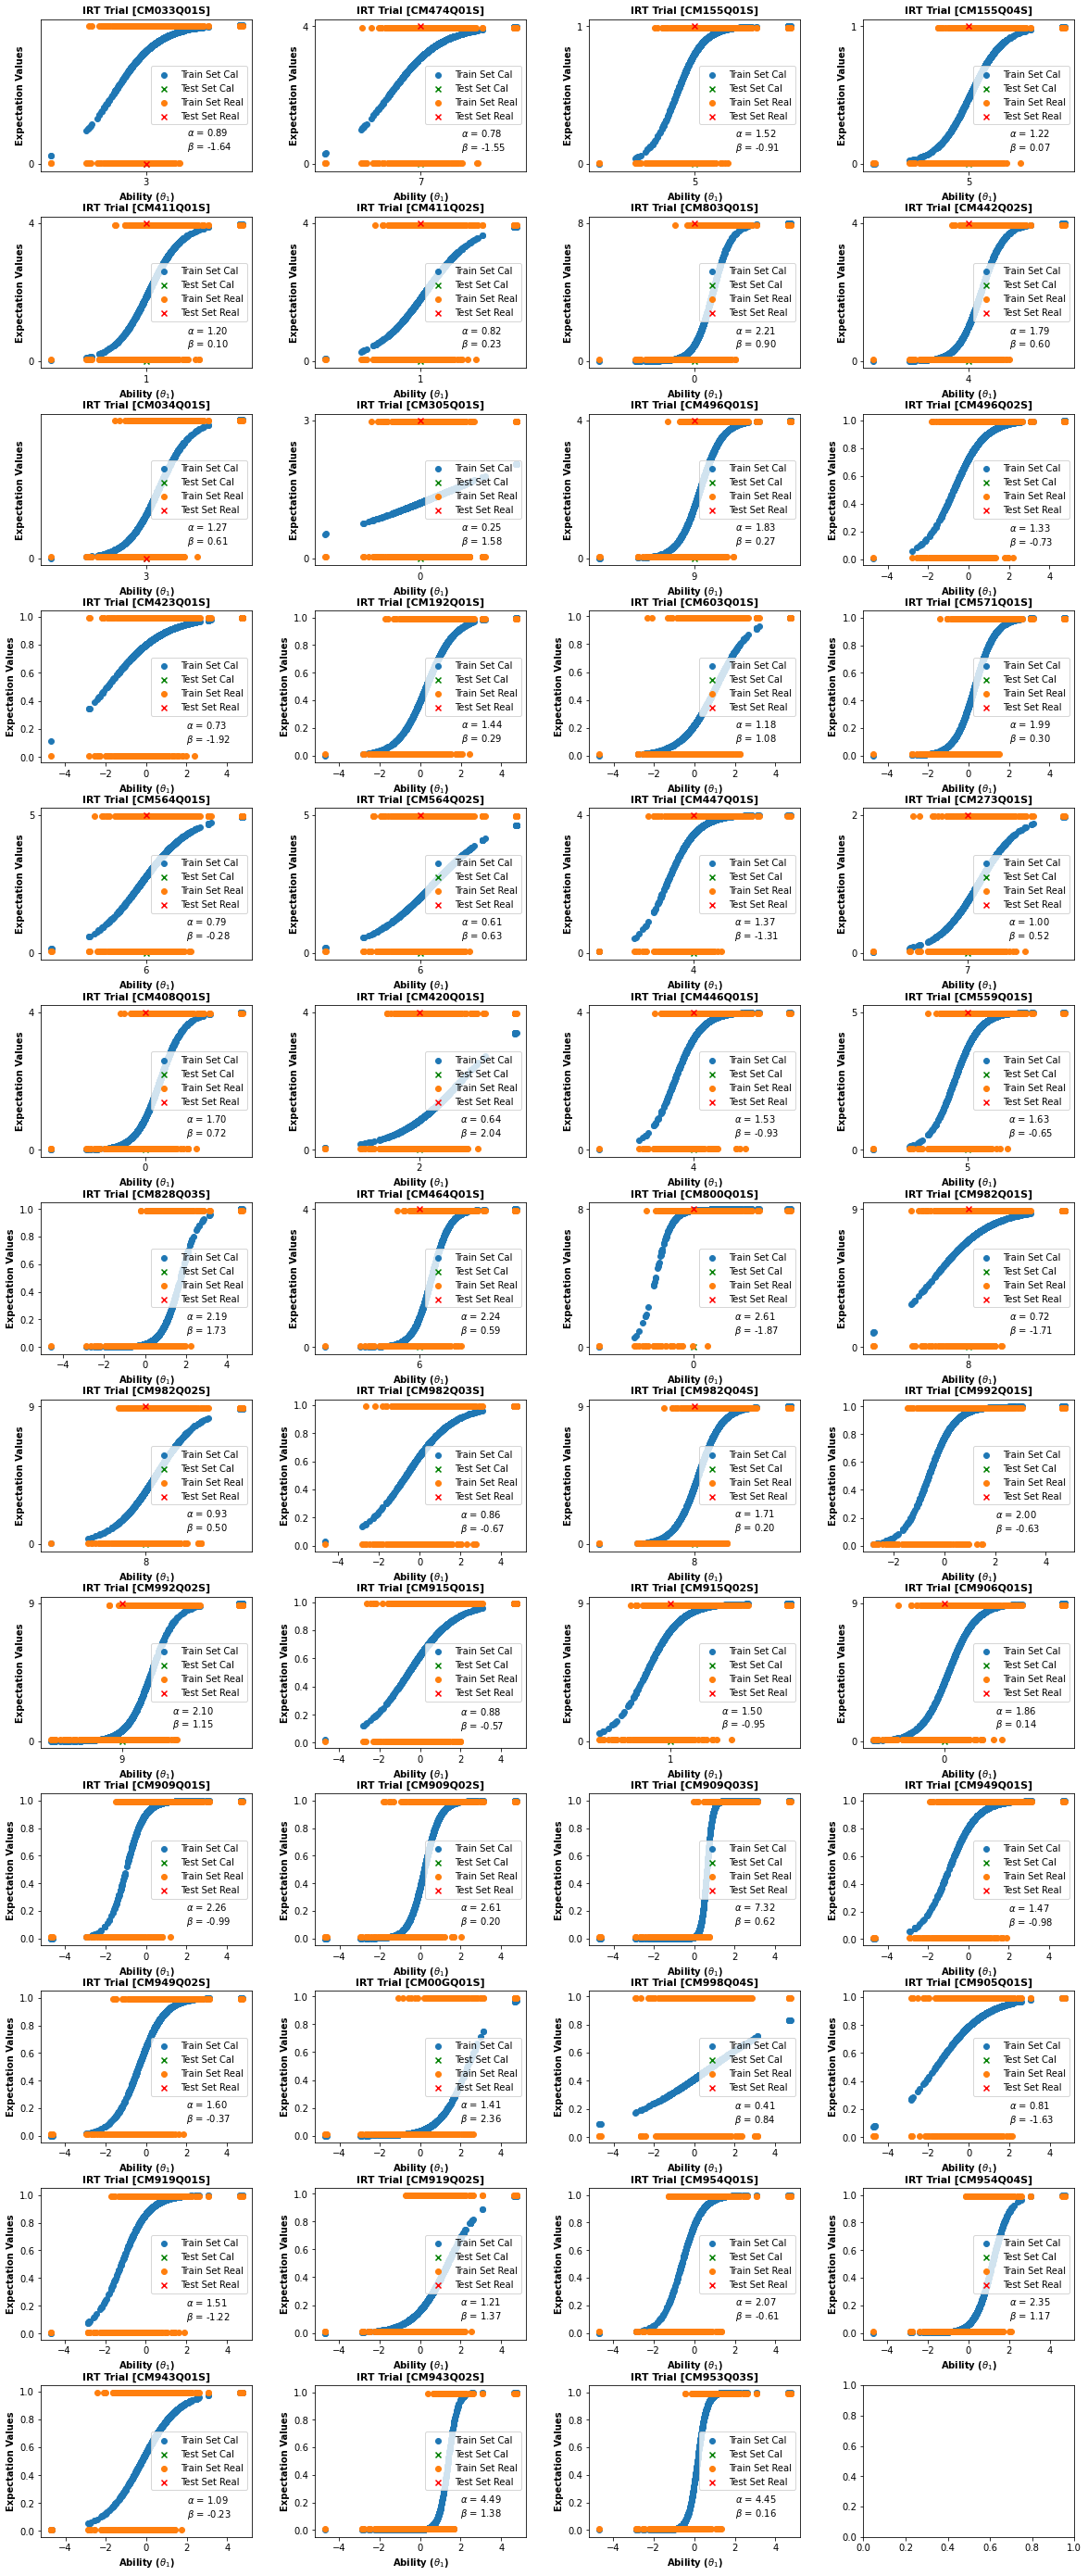

In [258]:
# 최종 plotting 결과를 격자 방식으로 나열
f, axes = plt.subplots(13, 4)
garo = 0
sero = 0
rank = 0

# 격자 크기 설정
f.set_size_inches((20, 50))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 놀고먹는 xs

# 격자 채워넣기

#start_16bit = columcolum.shape[0] // 16

#while start_16bit >= 0:
    
for i in range(seed_z.shape[1]):
    copy_th = vect_th.copy()              # 다음 문제에 활용하기 위해 리셋
    copy_z = vect_z[:, i].copy()                  # 다음 문제에 활용하기 위해 리셋
    copy_real = vect_real[:, i].copy()            # 다음 문제에 활용하기 위해 리셋
    
    for j in range(seed_z[:, i].shape[0]):
        
        n = seed_z[:, i].shape[0] - (j + 1)
        
        if np.isnan(seed_z[:, i][n]):
            copy_th = np.delete(copy_th, n)
            copy_z = np.delete(copy_z, n)
            copy_real = np.delete(copy_real, n)
            
    mono_x = []
    mono_y = []
    mono_z = []
            
    for liszt in threshed_theta:
        criterion = liszt[1]
        if criterion == columcolum[i]:
            mono_x.append(criterion[3])            # theta값
            mono_y.append(criterion[6])            # 모델 계산값
            mono_z.append(criterion[2])            # 실제 정오 여부
            
    xs = copy_th.tolist()    # Theta Column
    #print(xs)
    ys = copy_z.tolist()    # CM411Q02S Column
    #print(ys)
    zs = copy_real.tolist()   # CM411Q02S Real df Column

    axes[garo, sero].scatter(x=xs, y=ys, label='Train Set Cal')
    axes[garo, sero].scatter(x=mono_x, y=mono_y, color='g', marker='x', label='Test Set Cal')
    axes[garo, sero].scatter(x=xs, y=zs, label='Train Set Real')
    axes[garo, sero].scatter(x=mono_x, y=mono_z, color='r', marker='x', label='Test Set Real')

    axes[garo, sero].set_title('IRT Trial [{0}]'.format(columcolum[i]), fontdict={'weight': 'bold', 'size': 11})
    axes[garo, sero].set_xlabel('Ability ('r'$\theta_1$'')', fontdict={'weight': 'bold', 'size': 10})
    axes[garo, sero].set_ylabel('Expectation Values', fontdict={'weight': 'bold', 'size': 10})
    
    axes[garo, sero].text(2, 0.2, r'$\alpha$ = {0:0.2f}'.format(alpha_1[0][rank]), size = 10)
    axes[garo, sero].text(2, 0.1, r'$\beta$ = {0:0.2f}'.format(beta_1[0][rank]), size = 10)
    
    axes[garo, sero].legend(loc='right')
    
    sero += 1
    garo += sero // 4
    sero = sero % 4
    rank += 1

plt.show()